In [1]:
import pandas as pd

In [2]:
data  = pd.read_excel('/home/carllos/UFAL/M.L/barrettII_eyes_clustering.xlsx')

data.head(5)

,ID,AL,ACD,WTW,K1,K2,Correto
0,0,23.79,3.32,12.0,43.60,44.29,S
1,1,24.60,3.39,12.3,42.03,43.95,S
2,2,24.59,3.51,12.3,42.83,43.05,S
3,3,24.04,2.96,12.0,42.35,42.83,S
4,4,24.80,2.44,12.2,41.01,41.67,S


In [3]:
data_cluster = data.iloc[:, 1:-1] #sem coluna ID e Correto
data_cluster.head(1)

,AL,ACD,WTW,K1,K2
0,23.79,3.32,12.0,43.6,44.29


In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

pred_y = kmeans.fit_predict(data_cluster)


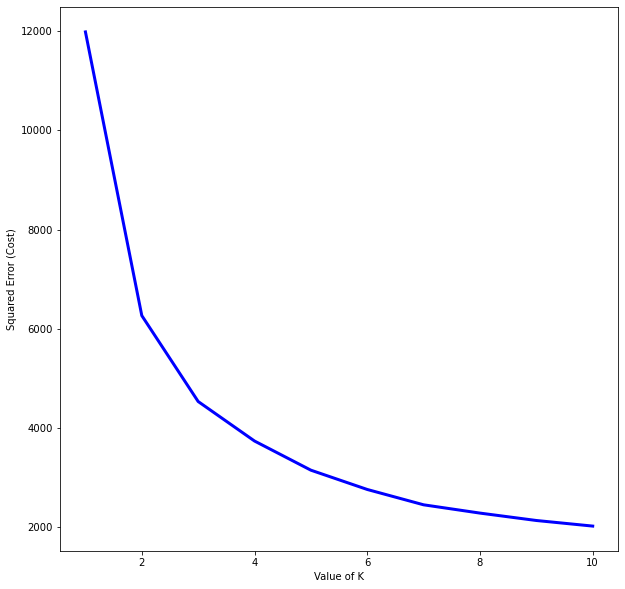

In [18]:
import matplotlib.pyplot as plt
#elbow method 
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(data_cluster)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
fig = plt.subplots(figsize=(10, 10))
plt.plot(range(1, 11), cost, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

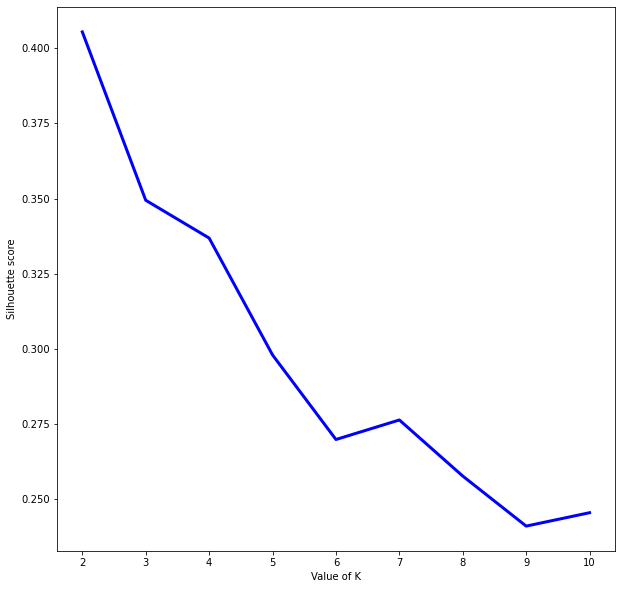

In [6]:
from sklearn.metrics import silhouette_score

scores =[]
for i in range(2, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(data_cluster)
     
    # calculates squared error
    # for the clustered points
    scores.append(silhouette_score(data_cluster, KM.labels_))    
 
# plot the cost against K values
fig = plt.subplots(figsize=(10, 10))
plt.plot(range(2, 11), scores, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Silhouette score")
plt.show() # clear the plot


In [19]:
clusters = pd.DataFrame(pred_y, columns = ['Cluster'])
data_clusterized = data_cluster.join(clusters, sort =False)
data_clusterized.head(10)

,AL,ACD,WTW,K1,K2,Cluster
0,23.79,3.32,12.0,43.60,44.29,2
1,24.60,3.39,12.3,42.03,43.95,2
2,24.59,3.51,12.3,42.83,43.05,2
3,24.04,2.96,12.0,42.35,42.83,0
4,24.80,2.44,12.2,41.01,41.67,0
5,23.08,3.51,12.5,45.55,48.28,1
6,23.73,2.87,12.0,43.21,45.12,2
7,24.16,3.31,12.4,39.85,41.11,0
8,23.13,2.83,11.7,41.62,42.83,0
9,22.76,2.96,12.2,45.49,46.36,1


In [20]:
cluster0 = data_clusterized[data_clusterized['Cluster'] == 0]
cluster1 = data_clusterized[data_clusterized['Cluster'] == 1]
cluster2 = data_clusterized[data_clusterized['Cluster'] == 2]

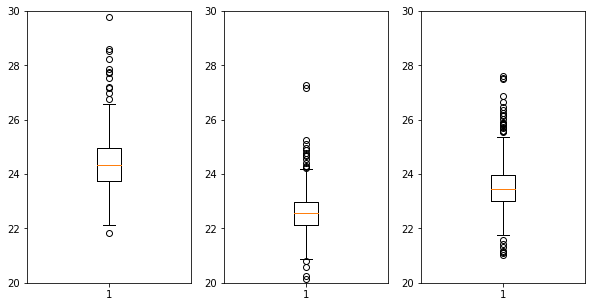

In [25]:

plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(cluster0['AL'])
plt.ylim(20,30)
plt.subplot(1, 3, 2)
plt.boxplot(cluster1['AL'])
plt.ylim(20,30)
plt.subplot(1,3,3)
plt.boxplot(cluster2['AL'])
plt.ylim(20,30)

plt.show()

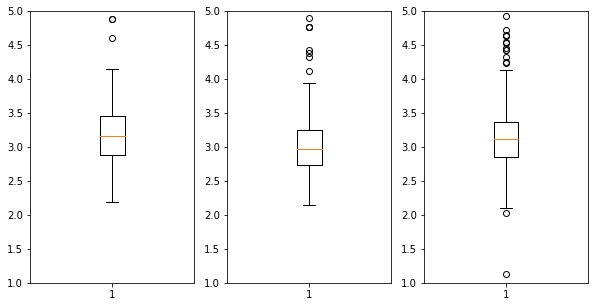

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(cluster0['ACD'])
plt.ylim(1, 5)
plt.subplot(1, 3, 2)
plt.boxplot(cluster1['ACD'])
plt.ylim(1, 5)
plt.subplot(1, 3, 3)
plt.boxplot(cluster2['ACD'])
plt.ylim(1, 5)
plt.show()

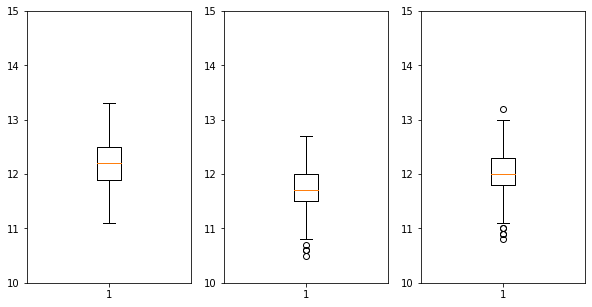

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(cluster0['WTW'])
plt.ylim(10, 15)
plt.subplot(1, 3, 2)
plt.boxplot(cluster1['WTW'])
plt.ylim(10, 15)
plt.subplot(1, 3, 3)
plt.boxplot(cluster2['WTW'])
plt.ylim(10, 15)
plt.show()

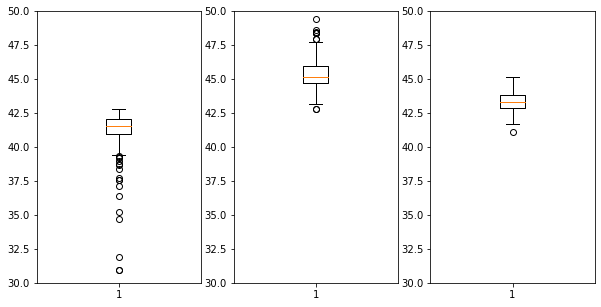

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(cluster0['K1'])
plt.ylim(30, 50)
plt.subplot(1, 3, 2)
plt.boxplot(cluster1['K1'])
plt.ylim(30, 50)
plt.subplot(1, 3, 3)
plt.boxplot(cluster2['K1'])
plt.ylim(30, 50)
plt.show()

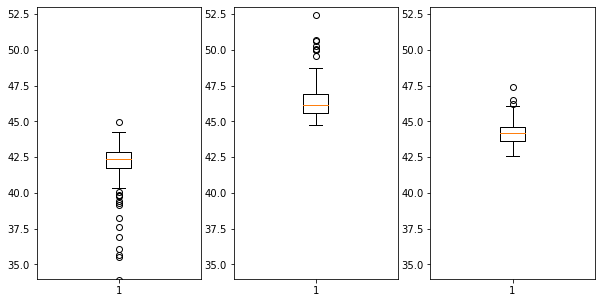

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.boxplot(cluster0['K2'])
plt.ylim(34, 53)
plt.subplot(1, 3, 2)
plt.boxplot(cluster1['K2'])
plt.ylim(34, 53)
plt.subplot(1, 3, 3)
plt.boxplot(cluster2['K2'])
plt.ylim(34, 53)
plt.show()

In [30]:
data.iloc[:, -1]

data_clusterized_correto = data_clusterized.join(data.iloc[:, -1], sort = False)

data_clusterized_correto.head(20)


,AL,ACD,WTW,K1,K2,Cluster,Correto
0,23.79,3.32,12.0,43.60,44.29,2,S
1,24.60,3.39,12.3,42.03,43.95,2,S
2,24.59,3.51,12.3,42.83,43.05,2,S
3,24.04,2.96,12.0,42.35,42.83,0,S
4,24.80,2.44,12.2,41.01,41.67,0,S
5,23.08,3.51,12.5,45.55,48.28,1,S
6,23.73,2.87,12.0,43.21,45.12,2,S
7,24.16,3.31,12.4,39.85,41.11,0,S
8,23.13,2.83,11.7,41.62,42.83,0,S
9,22.76,2.96,12.2,45.49,46.36,1,N


Corretos = 'S' no cluster 0: 237
Corretos = 'S' no cluster 1: 302
Corretos = 'S' no cluster 1: 543


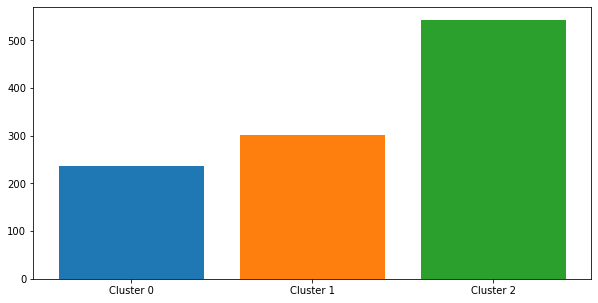

In [34]:
cluster0_correto = data_clusterized_correto[data_clusterized_correto['Cluster']== 0]
cluster1_correto = data_clusterized_correto[data_clusterized_correto['Cluster']== 1]
cluster2_correto = data_clusterized_correto[data_clusterized_correto['Cluster']== 2]

plt.figure(figsize=(10,5))

plt.bar("Cluster 0", cluster0_correto[cluster0_correto['Correto']== 'S'].shape[0])
plt.bar("Cluster 1", cluster1_correto[cluster1_correto['Correto']== 'S'].shape[0])
plt.bar("Cluster 2", cluster2_correto[cluster2_correto['Correto']== 'S'].shape[0])


print(f"Corretos = 'S' no cluster 0: {cluster0_correto[cluster0_correto['Correto']== 'S'].shape[0]}")
print(f"Corretos = 'S' no cluster 1: {cluster1_correto[cluster1_correto['Correto']== 'S'].shape[0]}")
print(f"Corretos = 'S' no cluster 1: {cluster2_correto[cluster2_correto['Correto']== 'S'].shape[0]}")


In [35]:
cluster0.mean()

#olhos maiores (AL)
#profundidade da cavidade grande (ACD)
#branco-a-branco alto (WTW)
#curvaturas da cornea menor (K1 e K2)

AL         24.521922
ACD         3.184685
WTW        12.228228
K1         41.253333
K2         42.155766
Cluster     0.000000
dtype: float64

In [36]:
cluster1.mean()
#olhos menores
#Profundidade da cavidade anterior menor
#branco-a-branco menor
#curvaturas da cornea maior

AL         22.593333
ACD         3.005320
WTW        11.719749
K1         45.386575
K2         46.375251
Cluster     1.000000
dtype: float64

In [37]:
cluster2.mean()
#olhos maiores (AL)
#profundidade da cavidade grande (ACD)
#branco-a-branco alto (WTW)
#curvatura da cornea grande (menor que o cluster 1)


AL         23.547860
ACD         3.131110
WTW        12.011493
K1         43.334531
K2         44.184571
Cluster     2.000000
dtype: float64